In [ ]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt # `pip install datatable` if not already installed

In [3]:
train_transaction =  dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/train_transaction.csv").to_pandas()
train_identity = dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/train_identity.csv").to_pandas()

# test_transaction = dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/test_transaction.csv").to_pandas()
# test_identity = dt.fread("/home/rmodi/Documents/CSE519/hw2/dataset/test_identity.csv").to_pandas()

In [4]:
trainset = pd.merge(train_transaction, train_identity, on='TransactionID', how='outer')

In [5]:
trainset = trainset[["TransactionID","DeviceType","DeviceInfo","TransactionDT","TransactionAmt","ProductCD","card4","card6","P_emaildomain","R_emaildomain","addr1","addr2","dist1","dist2","isFraud"]]

In [6]:
trainset.iloc[:5]

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud
0,2987000,NaN,NaN,86400,68.5,W,discover,credit,,,315.0,87.0,19.0,NaN,False
1,2987001,NaN,NaN,86401,29.0,W,mastercard,credit,gmail.com,,325.0,87.0,NaN,NaN,False
2,2987002,NaN,NaN,86469,59.0,W,visa,debit,outlook.com,,330.0,87.0,287.0,NaN,False
3,2987003,NaN,NaN,86499,50.0,W,mastercard,debit,yahoo.com,,476.0,87.0,NaN,NaN,False
4,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M,86506,50.0,H,mastercard,credit,gmail.com,,420.0,87.0,NaN,NaN,False


In [7]:
trainset.describe()

,TransactionID,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
count,5.905400e+05,5.905400e+05,590540.000000,524834.000000,524834.000000,238269.000000,37627.000000
mean,3.282270e+06,7.372311e+06,135.027176,290.733794,86.800630,118.502180,231.855423
std,1.704744e+05,4.617224e+06,239.162522,101.741072,2.690623,371.872026,529.053494
min,2.987000e+06,8.640000e+04,0.251000,100.000000,10.000000,0.000000,0.000000
25%,3.134635e+06,3.027058e+06,43.321000,204.000000,87.000000,3.000000,7.000000
50%,3.282270e+06,7.306528e+06,68.769000,299.000000,87.000000,8.000000,37.000000
75%,3.429904e+06,1.124662e+07,125.000000,330.000000,87.000000,24.000000,206.000000
max,3.577539e+06,1.581113e+07,31937.391000,540.000000,102.000000,10286.000000,11623.000000


In [8]:
trainset['TransactionDT_day'] = trainset['TransactionDT'].apply(lambda x: int(x/86400))
trainset['TransactionDT_hour'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24))
trainset['TransactionDT_min'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24%1*60))
trainset['TransactionDT_sec'] = trainset['TransactionDT'].apply(lambda x: int(x/86400%1*24%1*60%1*60))

Question 1
----------

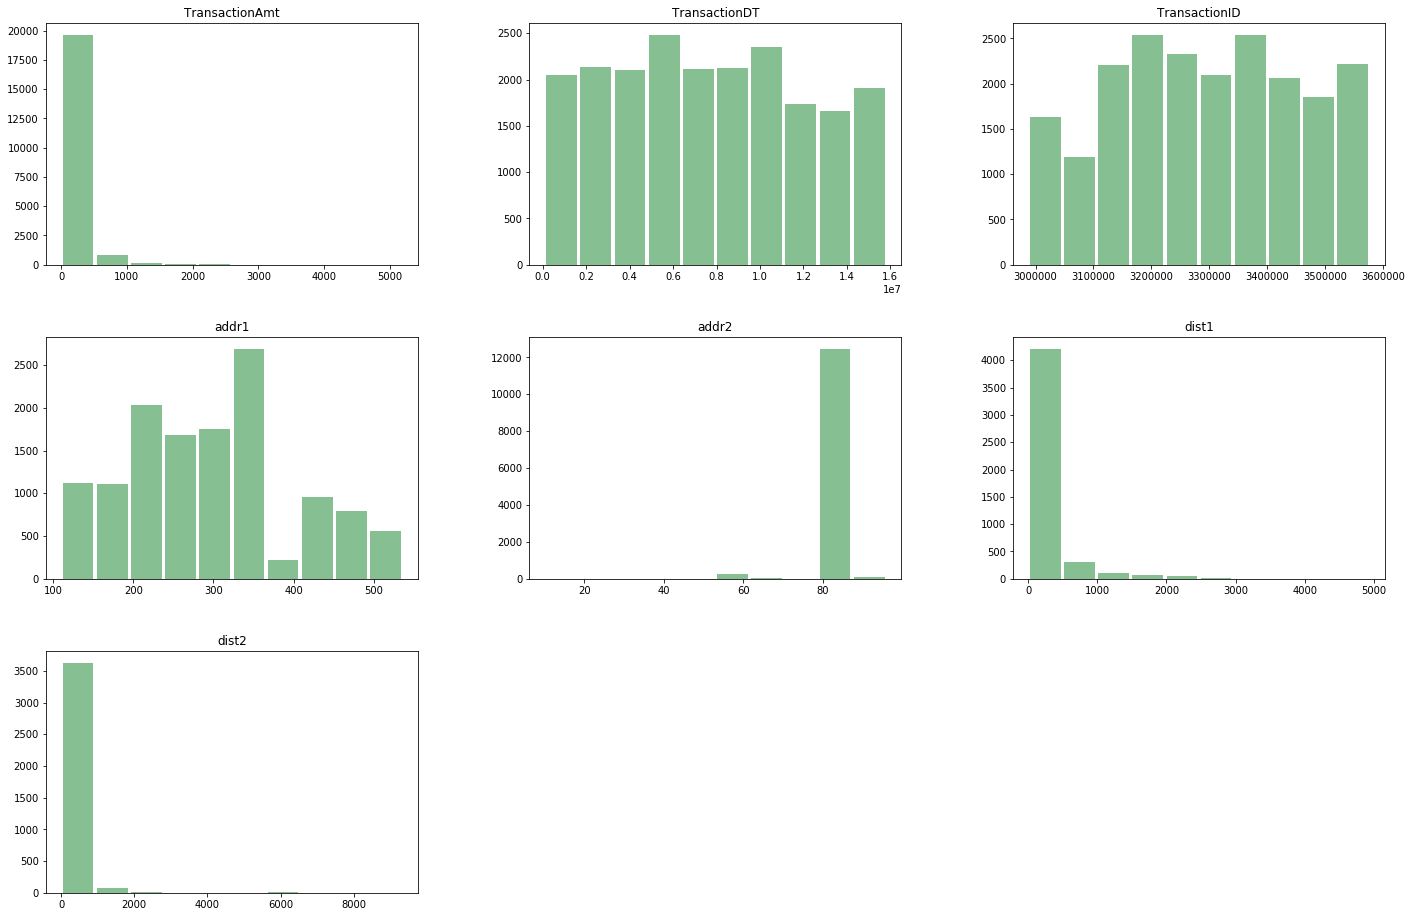

In [9]:
hist0 = trainset[trainset['isFraud'] == True][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].hist(grid=False, figsize=(24,16), color='#86bf91', zorder=2, rwidth=0.9)

In [10]:
trainset[trainset['isFraud'] == True][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].describe()

,TransactionID,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
count,2.066300e+04,2.066300e+04,20663.000000,12922.000000,12922.000000,4755.000000,3731.000000
mean,3.294952e+06,7.690033e+06,149.244779,294.317134,86.286024,174.588854,201.472259
std,1.620403e+05,4.416551e+06,232.212163,103.584955,4.936238,424.232313,451.589576
min,2.987203e+06,8.976000e+04,0.292000,110.000000,10.000000,0.000000,0.000000
25%,3.167366e+06,3.965858e+06,35.044000,204.000000,87.000000,3.000000,7.000000
50%,3.291934e+06,7.575230e+06,75.000000,299.000000,87.000000,10.000000,49.000000
75%,3.428646e+06,1.121743e+07,161.000000,330.000000,87.000000,85.500000,233.000000
max,3.577526e+06,1.581088e+07,5191.000000,536.000000,96.000000,4942.000000,9337.000000


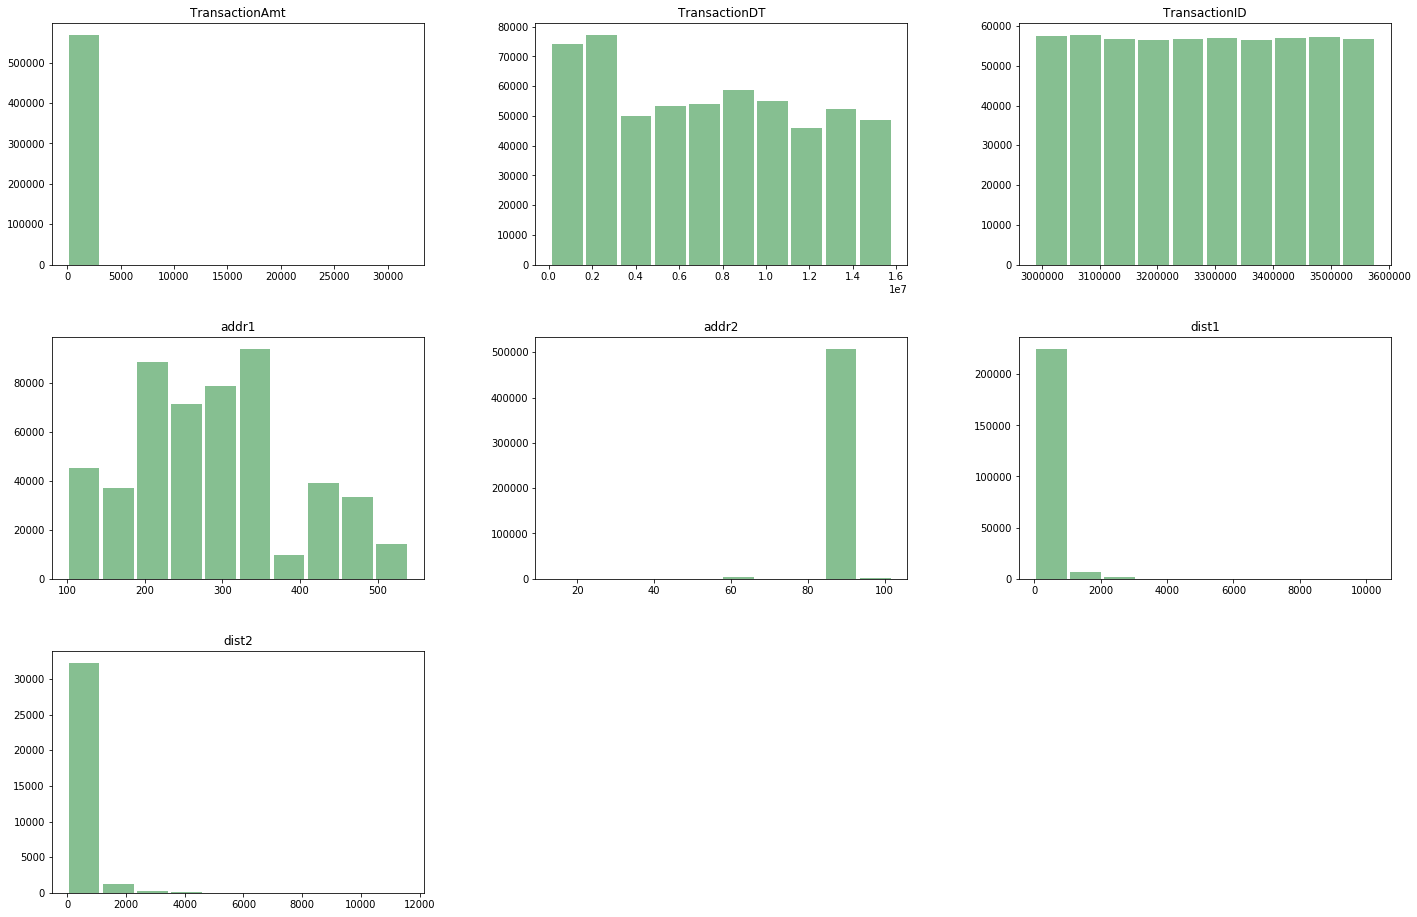

In [11]:
hist0 = trainset[trainset['isFraud'] == False][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].hist(grid=False, figsize=(24,16), color='#86bf91', zorder=2, rwidth=0.9)

In [12]:
trainset[trainset['isFraud'] == False][["TransactionID","TransactionDT","TransactionAmt","addr1","addr2","dist1","dist2"]].describe()

,TransactionID,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
count,5.698770e+05,5.698770e+05,569877.000000,511912.000000,511912.000000,233514.000000,33896.000000
mean,3.281810e+06,7.360791e+06,134.511665,290.643341,86.813620,117.360098,235.199758
std,1.707548e+05,4.623930e+06,239.395078,101.692564,2.607742,370.641879,536.798492
min,2.987000e+06,8.640000e+04,0.251000,100.000000,13.000000,0.000000,0.000000
25%,3.133317e+06,3.010651e+06,43.970000,204.000000,87.000000,3.000000,7.000000
50%,3.281808e+06,7.271678e+06,68.500000,299.000000,87.000000,8.000000,36.000000
75%,3.429974e+06,1.125334e+07,120.000000,330.000000,87.000000,24.000000,206.000000
max,3.577539e+06,1.581113e+07,31937.391000,540.000000,102.000000,10286.000000,11623.000000


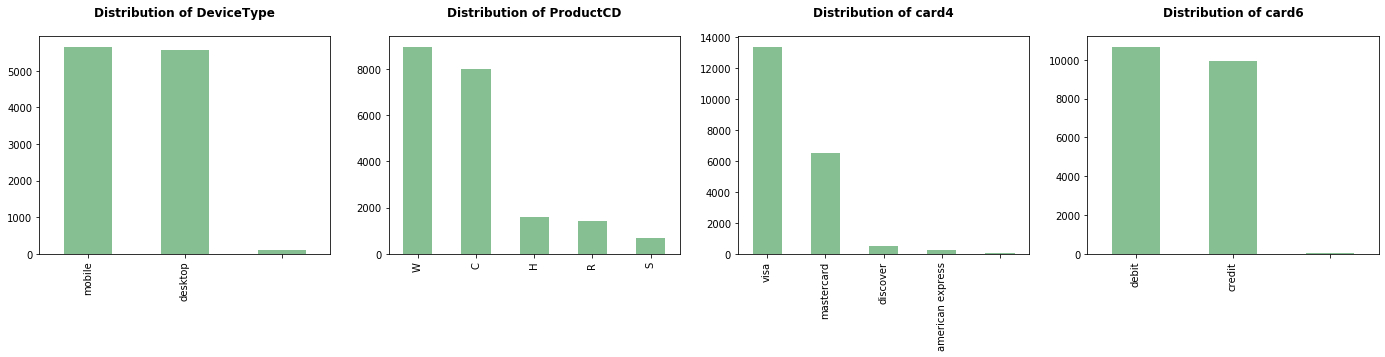

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(24, 4))

for i, column in enumerate(["DeviceType","ProductCD","card4","card6"]):
    trainset[trainset['isFraud'] == True][column].value_counts().plot(kind='bar', color='#86bf91', ax=axes[i])
    axes[i].set_title("Distribution of " + column, pad=20, fontweight='bold', fontsize=12)

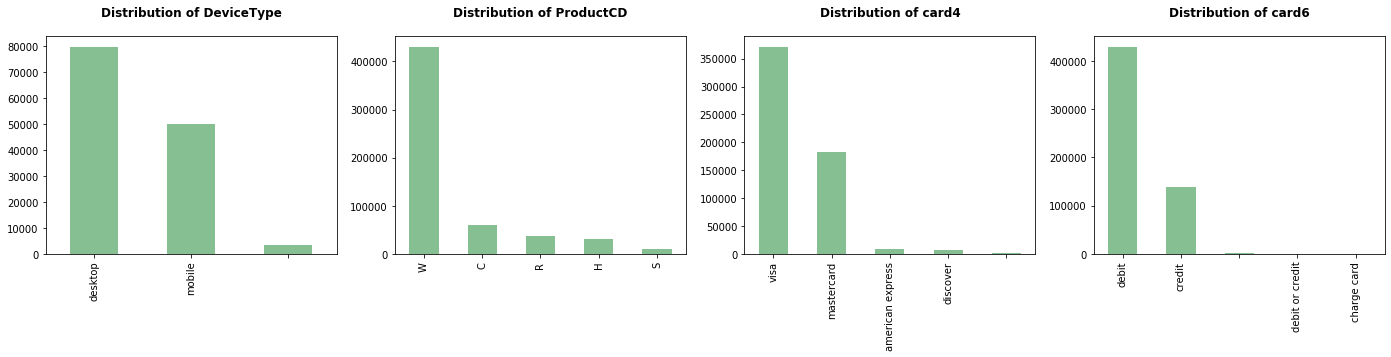

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(24, 4))

for i, column in enumerate(["DeviceType","ProductCD","card4","card6"]):
    trainset[trainset['isFraud'] == False][column].value_counts().plot(kind='bar', color='#86bf91', ax=axes[i])
    axes[i].set_title("Distribution of " + column, pad=20, fontweight='bold', fontsize=12)

In [15]:
trainset[trainset['isFraud'] == True]['DeviceInfo'].value_counts()

Windows                                   3121
                                          2711
iOS Device                                1240
MacOS                                      278
hi6210sft Build/MRA58K                     180
SM-A300H Build/LRX22G                      169
rv:57.0                                    103
Trident/7.0                                 96
rv:11.0                                     76
LG-D320 Build/KOT49I.V10a                   61
SM-J700M Build/MMB29K                       60
SM-J320M Build/LMY47V                       57
KFFOWI Build/LVY48F                         51
CRO-L03 Build/HUAWEICRO-L03                 51
rv:58.0                                     49
SM-A510M Build/MMB29K                       45
rv:59.0                                     44
Moto G (4) Build/NPJ25.93-14.7              40
SM-G920P Build/NRD90M                       39
SM-J500M Build/LMY48B                       39
SM-G610M Build/MMB29K                       37
Moto G (5) Pl

In [16]:
trainset[trainset['isFraud'] == False]['DeviceInfo'].value_counts()

Windows                           44601
                                  22856
iOS Device                        18542
MacOS                             12295
Trident/7.0                        7344
rv:11.0                            1825
rv:57.0                             859
SM-J700M Build/MMB29K               489
SM-G610M Build/MMB29K               424
SM-G531H Build/LMY48B               377
rv:59.0                             318
SM-G532M Build/MMB29T               304
SM-G935F Build/NRD90M               303
SM-G955U Build/NRD90M               295
ALE-L23 Build/HuaweiALE-L23         283
SM-G950U Build/NRD90M               274
SM-G930V Build/NRD90M               274
rv:52.0                             244
SAMSUNG                             230
rv:58.0                             220
SM-N950U Build/NMF26X               196
SM-G950F Build/NRD90M               191
SM-G570M Build/MMB29K               179
Moto G (4) Build/NPJ25.93-14.7      179
rv:48.0                             176


Question 2
----------

In [17]:
most_freq_country_code = trainset['addr2'].value_counts().idxmax()
addr2_set = trainset[trainset['addr2'] == most_freq_country_code]

In [18]:
addr2_set['TransactionDT'][60000:60005]

67055    1528548
67056    1528563
67057    1528580
67058    1528587
67059    1528589
Name: TransactionDT, dtype: int32

In [19]:
addr2_set.iloc[60000:60005]

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud,TransactionDT_day,TransactionDT_hour,TransactionDT_min,TransactionDT_sec
67055,3054055,mobile,iOS Device,1528548,150.00,H,mastercard,credit,gmail.com,gmail.com,126.0,87.0,NaN,NaN,False,17,16,35,48
67056,3054056,NaN,NaN,1528563,107.95,W,discover,credit,hotmail.com,,436.0,87.0,2.0,NaN,False,17,16,36,2
67057,3054057,NaN,NaN,1528580,94.95,W,mastercard,debit,aol.com,,315.0,87.0,NaN,NaN,False,17,16,36,19
67058,3054058,NaN,NaN,1528587,29.00,W,mastercard,debit,gmail.com,,269.0,87.0,1.0,NaN,False,17,16,36,26
67059,3054059,NaN,NaN,1528589,261.95,W,mastercard,debit,verizon.net,,494.0,87.0,1.0,NaN,False,17,16,36,28


Text(0, 0.5, 'Number of Transactions')

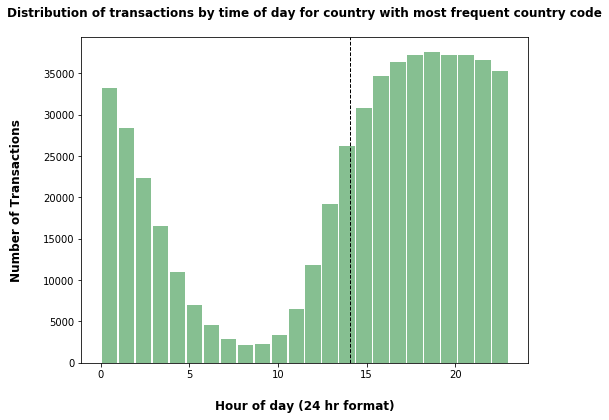

In [20]:
hist1 = addr2_set['TransactionDT_hour'].hist(bins=24, grid=False, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)
hist1.axvline(addr2_set['TransactionDT_hour'].mean(), color='k', linestyle='dashed', linewidth=1)

hist1.set_title("Distribution of transactions by time of day for country with most frequent country code", pad=20, fontweight='bold', fontsize=12)

hist1.set_xlabel("Hour of day (24 hr format)", labelpad=20, weight='bold', size=12)
hist1.set_ylabel("Number of Transactions", labelpad=20, weight='bold', size=12)

Question 3
----------

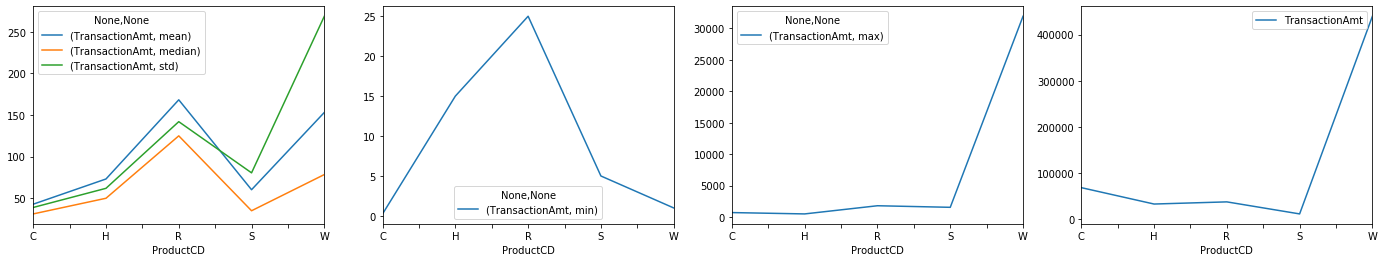

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(24, 4))
trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([np.mean, np.median, np.std]).plot(ax=axes[0])

trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([min]).plot(ax=axes[1])

trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).agg([max]).plot(ax=axes[2])

trainset[['ProductCD', 'TransactionAmt']].groupby(['ProductCD']).count().plot(ax=axes[3])

Question 4
----------

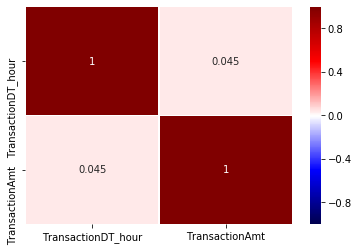

In [22]:
sns.heatmap(trainset[['TransactionDT_hour', 'TransactionAmt']].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True)

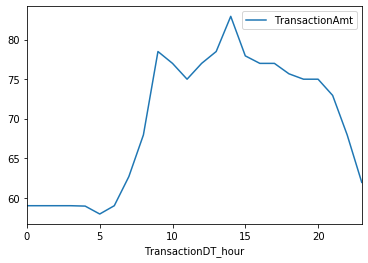

In [23]:
trainset[['TransactionDT_hour', 'TransactionAmt']].groupby(['TransactionDT_hour']).median().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cbc27d4a8>]],
      dtype=object)

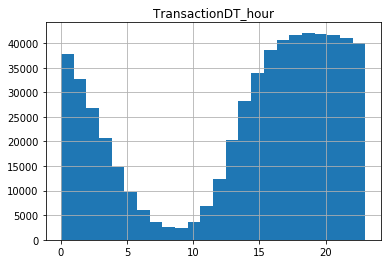

In [24]:
trainset[['TransactionDT_hour']].hist(bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cbc1d8908>]],
      dtype=object)

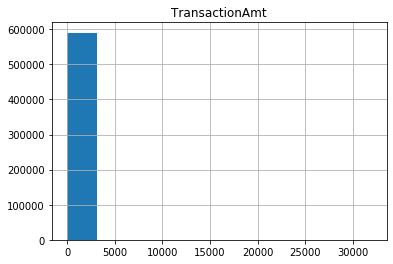

In [25]:
trainset[['TransactionAmt']].hist()

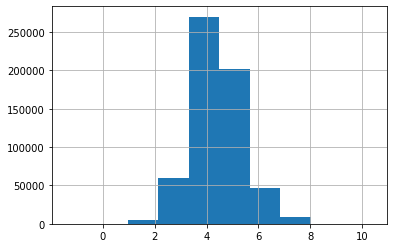

In [26]:
np.log(trainset['TransactionAmt']).hist()

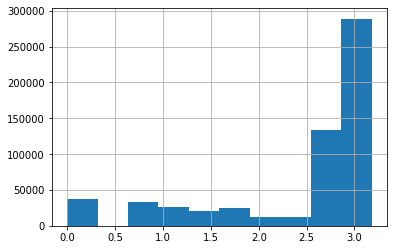

In [27]:
np.log(1 + trainset['TransactionDT_hour']).hist()

Question 5
----------

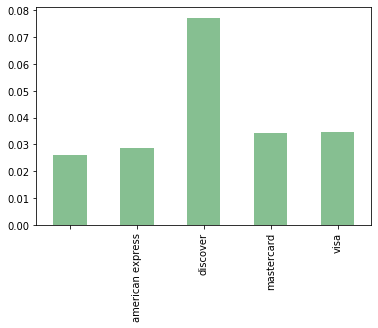

In [28]:
(trainset[trainset['isFraud'] == True]['card4'].value_counts()/trainset['card4'].value_counts()).plot(kind='bar', color='#86bf91')

In [29]:
trainset[trainset['isFraud'] == True].shape[0]/trainset.shape[0]

0.03499000914417313

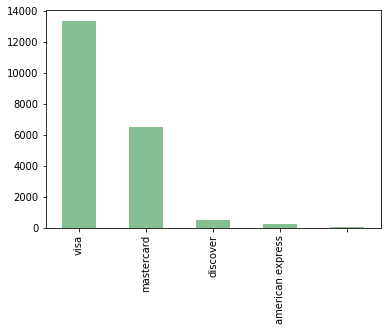

In [30]:
trainset[trainset['isFraud'] == True]['card4'].value_counts().plot(kind='bar', color='#86bf91')

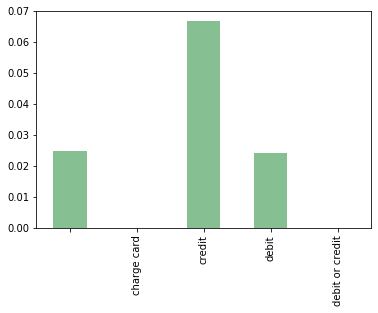

In [31]:
(trainset[trainset['isFraud'] == True]['card6'].value_counts()/trainset['card6'].value_counts()).plot(kind='bar', color='#86bf91')

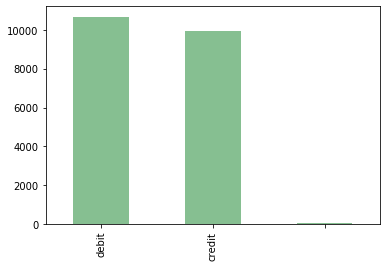

In [32]:
trainset[trainset['isFraud'] == True]['card6'].value_counts().plot(kind='bar', color='#86bf91')